In [18]:
#Unzipping the Dataset
from zipfile import ZipFile
dataset = "/content/CatsAndDogsDataset.zip"

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Done')

Done


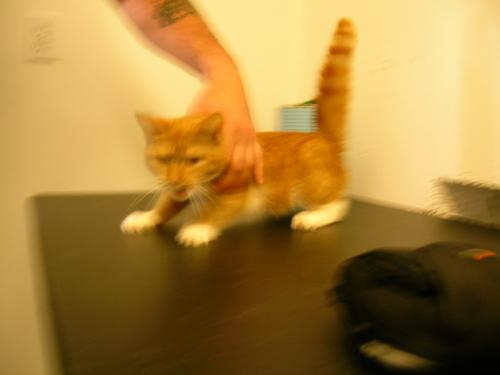

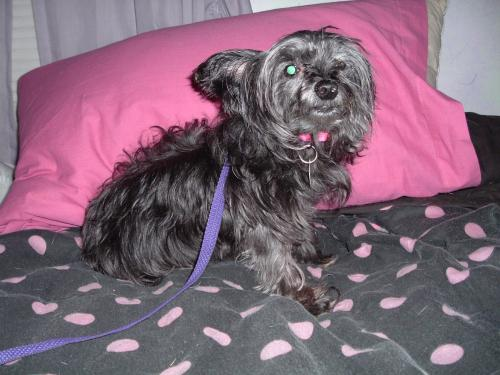

In [19]:
# Python code to read image and displaying the images 
from google.colab.patches import cv2_imshow
import cv2
cat_image = cv2.imread("/content/CatsAndDogsDataset/Cat/0.jpg",cv2.IMREAD_UNCHANGED)
dog_image = cv2.imread("/content/CatsAndDogsDataset/Dog/0.jpg",cv2.IMREAD_UNCHANGED)
cv2_imshow(cat_image)
cv2_imshow(dog_image)

In [20]:
#Importing the required modules
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

data_dir = '/content/CatsAndDogsDataset'

# Loading cat images
cat_images = []
cat_labels = []

cat_folder = os.path.join(data_dir, 'Cat')
for filename in os.listdir(cat_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  
        file_path = os.path.join(cat_folder, filename)
        image = cv2.imread(file_path)  # Reading the image using OpenCV
        image = cv2.resize(image, (64, 64))  # Resizing the image to a fixed size
        cat_images.append(image)
        cat_labels.append(0)  # Assigning a label (0 for cat)

# Loading dog images
dog_images = []
dog_labels = []

dog_folder = os.path.join(data_dir, 'Dog')
for filename in os.listdir(dog_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Add more image extensions if needed
        file_path = os.path.join(dog_folder, filename)
        image = cv2.imread(file_path)  # Reading the image using OpenCV
        image = cv2.resize(image, (64, 64))  # Resizing the image to a fixed size
        dog_images.append(image)
        dog_labels.append(1)  # Assigning a label (1 for dog)

# Combining cat and dog data
images = np.concatenate([cat_images, dog_images], axis=0)
labels = np.concatenate([cat_labels, dog_labels], axis=0)

In [21]:
# Reshaping the image data to 2D format 
images = np.array(images)
images = np.reshape(images, (images.shape[0], -1))

# Spliting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Define and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [39]:
# Evaluating accuracy of model
accuracy = model.score(X_test, y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.3333333333333333
